# Plotting Risk Flow

### Process Risk Flow Data

Steps to create a visualization of risk flow from risk flow matrix

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

In [2]:
risk_flow_matrix = pd.read_csv('risk_flow_matrix4.csv')
risk_flow_matrix

,GEOID,17091011700,17091011800,17119400951,17119400952,17135957500,17119401100,17119401500,17119401722,17189950200,...,17037000900,17037001600,17037000500,17037001700,17037001900,17037000100,17037001500,17037000400,17037000300,17037000200
0,17091011700,0.000004,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,17091011800,0.000003,0.000022,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,17119400951,0.000000,0.000000,0.000274,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,17119400952,0.000000,0.000000,0.000028,0.000003,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,17135957500,0.000000,0.000000,0.000000,0.000000,0.000038,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,17037000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000024,0.000000,0.0,0.0,0.000292,0.000005,0.000000,0.000000,0.000011
3119,17037001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000003,0.000003,0.0,0.0,0.000000,0.000047,0.000000,0.000003,0.000000
3120,17037000400,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000014,0.000021,0.0,0.0,0.000000,0.000038,0.000017,0.000021,0.000000
3121,17037000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000002,0.0,0.0,0.000000,0.000000,0.000000,0.000009,0.000000


Find all risk flows that are greater than zero. Append the origin and destination of the risk flow and the risk flow magnitude to a list

In [3]:
risk_flows_list = []
n = len(risk_flow_matrix)
cols = risk_flow_matrix.columns[1:].values.tolist()
for i in range(n):
    for j in cols:
        if risk_flow_matrix.loc[i, j] > 0:
            x = risk_flow_matrix.loc[i, 'GEOID']
            y = j
            val = risk_flow_matrix.loc[i, j]
            risk_flows_list.append([str(x), y, val])

In [4]:
risk_flows_df = pd.DataFrame(risk_flows_list)
risk_flows_df.columns = ['START','END','RISK_FLOW']
risk_flows_df.head()

,START,END,RISK_FLOW
0,17091011700,17091011700,0.000004
1,17091011700,17091010800,0.000014
2,17091011700,17091012100,0.000055
3,17091011700,17091012500,0.000018
4,17091011700,17091011900,0.000018


In [5]:
risk_flows_df.to_csv('risk_flows4_df.csv')

### Read Geo Data and Risk Flow Data from csv file

In [26]:
# read the illinois state shp data
illinois_shp = gpd.read_file('raw_il_census_tracts_shapefile/tl_2019_17_tract.shp')
# illinois_shp = illinois_shp.loc[:,('GEOID','geometry')]
# illinois_shp['centroid'] = illinois_shp.centroid.to_crs(epsg = 4326)
illinois_shp.COUNTYFP.unique()

array(['091', '119', '135', '189', '161', '089', '193', '143', '093',
       '197', '115', '073', '055', '163', '155', '139', '199', '043',
       '201', '031', '009', '169', '147', '099', '111', '035', '011',
       '065', '029', '113', '023', '097', '083', '021', '179', '109',
       '167', '027', '019', '045', '013', '121', '171', '079', '117',
       '025', '137', '053', '071', '185', '177', '141', '129', '195',
       '069', '175', '153', '037', '095', '057', '107', '047', '077',
       '063', '007', '133', '087', '191', '159', '049', '059', '183',
       '127', '075', '033', '061', '041', '101', '173', '001', '149',
       '067', '103', '105', '145', '005', '165', '003', '085', '017',
       '131', '125', '051', '181', '187', '015', '123', '081', '151',
       '203', '157', '039'], dtype=object)

In [7]:
risk_flows_df = pd.read_csv('risk_flows4_df.csv').loc[:,('START','END','RISK_FLOW')]
risk_flows_df['START'] = risk_flows_df['START'].astype(str)
risk_flows_df['END'] = risk_flows_df['END'].astype(str)
risk_flows_df

,START,END,RISK_FLOW
0,17091011700,17091011700,0.000004
1,17091011700,17091010800,0.000014
2,17091011700,17091012100,0.000055
3,17091011700,17091012500,0.000018
4,17091011700,17091011900,0.000018
...,...,...,...
80111,17037000200,17037000600,0.000012
80112,17037000200,17037000700,0.000012
80113,17037000200,17037000100,0.000034
80114,17037000200,17037000300,0.000004


In [8]:
start_geo_df = pd.merge(risk_flows_df, illinois_shp, how='left', left_on='START', right_on='GEOID')
start_geo_df = start_geo_df[['START', 'END', 'RISK_FLOW', 'centroid']]
start_geo_df = start_geo_df.rename(columns = {'centroid' : 'START_centroid'})
start_geo_df

,START,END,RISK_FLOW,START_centroid
0,17091011700,17091011700,0.000004,POINT (-87.87355 41.12949)
1,17091011700,17091010800,0.000014,POINT (-87.87355 41.12949)
2,17091011700,17091012100,0.000055,POINT (-87.87355 41.12949)
3,17091011700,17091012500,0.000018,POINT (-87.87355 41.12949)
4,17091011700,17091011900,0.000018,POINT (-87.87355 41.12949)
...,...,...,...,...
80111,17037000200,17037000600,0.000012,POINT (-88.82573 42.11145)
80112,17037000200,17037000700,0.000012,POINT (-88.82573 42.11145)
80113,17037000200,17037000100,0.000034,POINT (-88.82573 42.11145)
80114,17037000200,17037000300,0.000004,POINT (-88.82573 42.11145)


In [9]:
end_geo_df = pd.merge(start_geo_df, illinois_shp, how='left', left_on='END', right_on='GEOID')
end_geo_df = end_geo_df[['START', 'END', 'RISK_FLOW', 'START_centroid', 'centroid']]
end_geo_df = end_geo_df.rename(columns = {'centroid' : 'END_centroid'})
end_geo_df

,START,END,RISK_FLOW,START_centroid,END_centroid
0,17091011700,17091011700,0.000004,POINT (-87.87355 41.12949),POINT (-87.87355 41.12949)
1,17091011700,17091010800,0.000014,POINT (-87.87355 41.12949),POINT (-87.70955 41.14835)
2,17091011700,17091012100,0.000055,POINT (-87.87355 41.12949),POINT (-87.89060 41.12322)
3,17091011700,17091012500,0.000018,POINT (-87.87355 41.12949),POINT (-87.87884 41.08424)
4,17091011700,17091011900,0.000018,POINT (-87.87355 41.12949),POINT (-87.86803 41.14539)
...,...,...,...,...,...
80111,17037000200,17037000600,0.000012,POINT (-88.82573 42.11145),POINT (-88.68183 41.98247)
80112,17037000200,17037000700,0.000012,POINT (-88.82573 42.11145),POINT (-88.70226 41.97375)
80113,17037000200,17037000100,0.000034,POINT (-88.82573 42.11145),POINT (-88.65253 42.10661)
80114,17037000200,17037000300,0.000004,POINT (-88.82573 42.11145),POINT (-88.86924 41.96281)


In [10]:
geo_line_df = end_geo_df
geo_line_df['FLOWLINES'] = pd.DataFrame([LineString([end_geo_df.loc[i, 'START_centroid'],
                                                 end_geo_df.loc[i, 'END_centroid']]) 
                                     for i in range(len(end_geo_df))])
geo_line_df

,START,END,RISK_FLOW,START_centroid,END_centroid,FLOWLINES
0,17091011700,17091011700,0.000004,POINT (-87.87355 41.12949),POINT (-87.87355 41.12949),LINESTRING (-87.8735501307837 41.1294892993365...
1,17091011700,17091010800,0.000014,POINT (-87.87355 41.12949),POINT (-87.70955 41.14835),LINESTRING (-87.8735501307837 41.1294892993365...
2,17091011700,17091012100,0.000055,POINT (-87.87355 41.12949),POINT (-87.89060 41.12322),LINESTRING (-87.8735501307837 41.1294892993365...
3,17091011700,17091012500,0.000018,POINT (-87.87355 41.12949),POINT (-87.87884 41.08424),LINESTRING (-87.8735501307837 41.1294892993365...
4,17091011700,17091011900,0.000018,POINT (-87.87355 41.12949),POINT (-87.86803 41.14539),LINESTRING (-87.8735501307837 41.1294892993365...
...,...,...,...,...,...,...
80111,17037000200,17037000600,0.000012,POINT (-88.82573 42.11145),POINT (-88.68183 41.98247),LINESTRING (-88.82572672169553 42.111446627841...
80112,17037000200,17037000700,0.000012,POINT (-88.82573 42.11145),POINT (-88.70226 41.97375),LINESTRING (-88.82572672169553 42.111446627841...
80113,17037000200,17037000100,0.000034,POINT (-88.82573 42.11145),POINT (-88.65253 42.10661),LINESTRING (-88.82572672169553 42.111446627841...
80114,17037000200,17037000300,0.000004,POINT (-88.82573 42.11145),POINT (-88.86924 41.96281),LINESTRING (-88.82572672169553 42.111446627841...


In [11]:
geo_risk_line_df = geo_line_df[['RISK_FLOW', 'FLOWLINES']]
geo_risk_line_df.columns = ['RISK_FLOW','geometry']
geo_risk_line_df['RISK_FLOW'] = geo_risk_line_df['RISK_FLOW']*10000
mean_risk = np.mean(geo_risk_line_df['RISK_FLOW'])
geo_risk_line_df = geo_risk_line_df[geo_risk_line_df['RISK_FLOW']> mean_risk] 
geo_risk_line_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RISK_FLOW,geometry
2,0.545395,LINESTRING (-87.8735501307837 41.1294892993365...
17,0.216413,LINESTRING (-87.87645999540121 41.139776758646...
19,0.419301,LINESTRING (-87.87645999540121 41.139776758646...
31,0.284043,LINESTRING (-87.87645999540121 41.139776758646...
34,2.742151,LINESTRING (-90.09829358278783 38.727629461594...
...,...,...
80092,0.235356,LINESTRING (-88.86923812557386 41.962811065935...
80103,0.240131,LINESTRING (-88.82572672169553 42.111446627841...
80106,0.240131,LINESTRING (-88.82572672169553 42.111446627841...
80113,0.340185,LINESTRING (-88.82572672169553 42.111446627841...


In [12]:
geo_risk_line_gdf = gpd.GeoDataFrame(geo_risk_line_df)

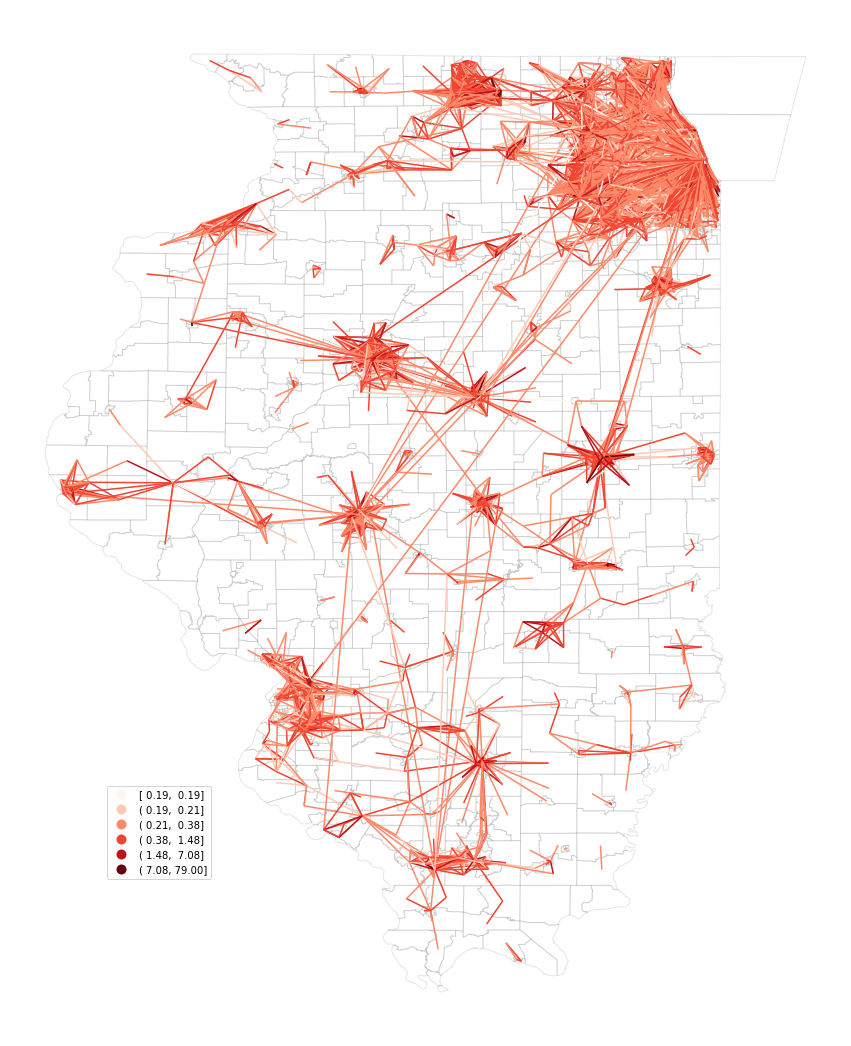

In [16]:
base_map = illinois_shp.plot(color='white', 
                   edgecolor='black', 
                   alpha = 0.1, 
                   figsize = (15,20))

risk_flow_map = geo_risk_line_gdf.plot(ax = base_map, 
                column = 'RISK_FLOW', 
                cmap='Reds', 
                scheme = 'percentiles',
                legend=True,
                markersize = 'RISK_FLOW', 
                figsize = (5,4))

# Adjust legend location
leg = risk_flow_map.get_legend()
leg.set_bbox_to_anchor((0.25,0.25))

risk_flow_map.axis('off')
plt.savefig('Plots/risk_flows_map.png', dpi = 200)


In [ ]:
# 